In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./survey_data_after.csv", encoding = "euc-kr")
df

,성별,맛집,휴양,자연경관,문화유산,액티비티,쇼핑,공연,전시물,경험,희망
0,남성,4,5,4,1,3,1,3,3,맛집,자연경관
1,여성,4,2,4,1,4,1,1,1,"맛집, 휴양, 자연경관, 액티비티","맛집, 휴양, 자연경관"
2,남성,4,2,5,5,3,3,3,5,"자연경관, 문화유산, 전시물","자연경관, 문화유산"
3,남성,5,5,5,5,4,1,4,4,"맛집, 휴양, 문화유산, 액티비티","휴양, 자연경관"
4,여성,5,4,5,3,3,2,2,4,"휴양, 자연경관","맛집, 자연경관"
...,...,...,...,...,...,...,...,...,...,...,...
153,남성,5,4,4,4,3,2,4,4,"맛집, 휴양, 문화유산",맛집
154,남성,5,5,4,3,5,1,1,1,"맛집, 휴양, 문화유산","자연경관, 액티비티"
155,여성,5,5,5,5,5,5,3,5,"휴양, 자연경관, 문화유산",자연경관
156,남성,5,2,2,2,4,4,4,1,"맛집, 쇼핑",액티비티


In [3]:
male_data = df.query("성별 == '남성'")
female_data = df.query("성별 == '여성'")

male_data

,성별,맛집,휴양,자연경관,문화유산,액티비티,쇼핑,공연,전시물,경험,희망
0,남성,4,5,4,1,3,1,3,3,맛집,자연경관
2,남성,4,2,5,5,3,3,3,5,"자연경관, 문화유산, 전시물","자연경관, 문화유산"
3,남성,5,5,5,5,4,1,4,4,"맛집, 휴양, 문화유산, 액티비티","휴양, 자연경관"
5,남성,5,5,5,3,4,4,3,2,"맛집, 휴양","맛집, 휴양, 자연경관"
7,남성,4,4,5,4,5,3,5,5,"액티비티, 쇼핑, 전시물","맛집, 문화유산"
...,...,...,...,...,...,...,...,...,...,...,...
152,남성,3,4,4,5,2,3,3,4,문화유산,"휴양, 자연경관"
153,남성,5,4,4,4,3,2,4,4,"맛집, 휴양, 문화유산",맛집
154,남성,5,5,4,3,5,1,1,1,"맛집, 휴양, 문화유산","자연경관, 액티비티"
156,남성,5,2,2,2,4,4,4,1,"맛집, 쇼핑",액티비티


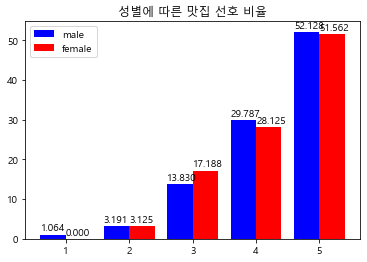

In [62]:
male_eat = male_data['맛집']
female_eat = female_data['맛집']
#female_eat = female_eat.append(pd.Series([0], index = [1]))

male_eat_per = [0]*5
female_eat_per = [0]*5

for i in range(5):
    male_eat_per[i] = male_eat.value_counts()[i+1] / male_eat.count() * 100
    
    if i == 0:
        continue
    #female_eat에 1일 경우가 없음.
    female_eat_per[i] = female_eat.value_counts()[i+1] / female_eat.count() * 100
    
    
x = np.arange(1, 6)
#female_eat.value_counts().plot.bar()
plt.rc('font', family = 'Malgun Gothic')
plt.title("성별에 따른 맛집 선호 비율")
plt.bar(x - 0.2, male_eat_per, 0.4, color ='blue', label = "male")
plt.bar(x + 0.2, female_eat_per,0.4, color ='red', label = "female")
for index, per in enumerate(male_eat_per):
    plt.text(x = index + 0.6, y = per + 1, s = "%.3f"%per)
    
for index, per in enumerate(female_eat_per):
    plt.text(x = index + 1.0, y = per + 1, s = "%.3f"%per)
plt.legend()

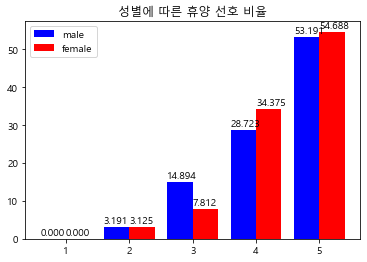

In [61]:
male_rest = male_data['휴양']
female_rest = female_data['휴양']

male_rest_per = [0]*5
female_rest_per = [0]*5

for i in range(1, 5):
    male_rest_per[i] = male_rest.value_counts()[i+1] / male_rest.count() * 100
    female_rest_per[i] = female_rest.value_counts()[i+1] / female_rest.count() * 100
    
    
x = np.arange(1, 6)
#female_eat.value_counts().plot.bar()
plt.rc('font', family = 'Malgun Gothic')
plt.title("성별에 따른 휴양 선호 비율")
plt.bar(x - 0.2, male_rest_per, 0.4, color ='blue', label = "male")
plt.bar(x + 0.2, female_rest_per,0.4, color ='red', label = "female")

for index, per in enumerate(male_rest_per):
    plt.text(x = index + 0.6, y = per + 1, s = "%.3f"%per)
    
for index, per in enumerate(female_rest_per):
    plt.text(x = index + 1.0, y = per + 1, s = "%.3f"%per)
plt.legend()

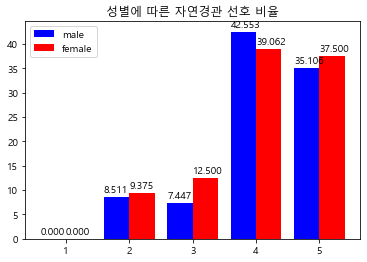

In [60]:
male_nature = male_data['자연경관']
female_nature = female_data['자연경관']

male_nature_per = [0]*5
female_nature_per = [0]*5

for i in range(1, 5):
    male_nature_per[i] = male_nature.value_counts()[i+1] / male_nature.count() * 100
    female_nature_per[i] = female_nature.value_counts()[i+1] / female_nature.count() * 100
    
    
x = np.arange(1, 6)
#female_eat.value_counts().plot.bar()
plt.rc('font', family = 'Malgun Gothic')
plt.title("성별에 따른 자연경관 선호 비율")
plt.bar(x - 0.2, male_nature_per, 0.4, color ='blue', label = "male")
plt.bar(x + 0.2, female_nature_per,0.4, color ='red', label = "female")

for index, per in enumerate(male_nature_per):
    plt.text(x = index + 0.6, y = per + 1, s = "%.3f"%per)
    
for index, per in enumerate(female_nature_per):
    plt.text(x = index + 1.0, y = per + 1, s = "%.3f"%per)
plt.legend()

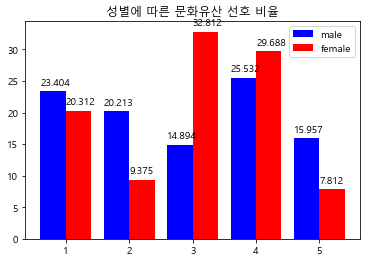

In [59]:
male_history = male_data['문화유산']
female_history = female_data['문화유산']

male_history_per = [0]*5
female_history_per = [0]*5

for i in range(0, 5):
    male_history_per[i] = male_history.value_counts()[i+1] / male_history.count() * 100
    female_history_per[i] = female_history.value_counts()[i+1] / female_history.count() * 100
    
    
x = np.arange(1, 6)
#female_eat.value_counts().plot.bar()
plt.rc('font', family = 'Malgun Gothic')
plt.title("성별에 따른 문화유산 선호 비율")
plt.bar(x - 0.2, male_history_per, 0.4, color ='blue', label = "male")
plt.bar(x + 0.2, female_history_per,0.4, color ='red', label = "female")

for index, per in enumerate(male_history_per):
    plt.text(x = index + 0.6, y = per + 1, s = "%.3f"%per)
    
for index, per in enumerate(female_history_per):
    plt.text(x = index + 1.0, y = per + 1, s = "%.3f"%per)
plt.legend()

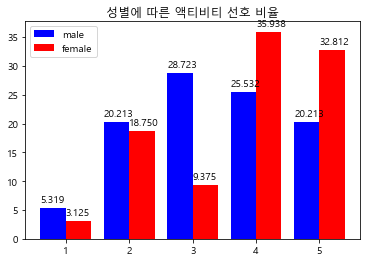

In [57]:
male = male_data['액티비티']
female = female_data['액티비티']

male_per = [0]*5
female_per = [0]*5

for i in range(0, 5):
    male_per[i] = male.value_counts()[i+1] / male.count() * 100.0
    female_per[i] = female.value_counts()[i+1] / female.count() * 100.0
    
    
x = np.arange(1, 6)
#female_eat.value_counts().plot.bar()
plt.rc('font', family = 'Malgun Gothic')
plt.title("성별에 따른 액티비티 선호 비율")
plt.bar(x - 0.2, male_per, 0.4, color ='blue', label = "male")
plt.bar(x + 0.2, female_per,0.4, color ='red', label = "female")

for index, per in enumerate(male_per):
    plt.text(x = index + 0.6, y = per + 1, s = "%.3f"%per)
    
for index, per in enumerate(female_per):
    plt.text(x = index + 1.0, y = per + 1, s = "%.3f"%per)
plt.legend()

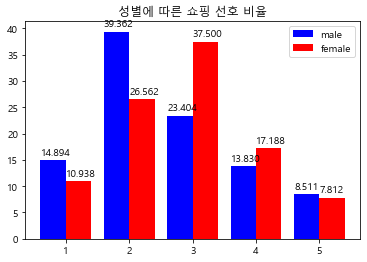

In [56]:
male = male_data['쇼핑']
female = female_data['쇼핑']

male_per = [0]*5
female_per = [0]*5

for i in range(0, 5):
    male_per[i] = male.value_counts()[i+1] / male.count() * 100
    female_per[i] = female.value_counts()[i+1] / female.count() * 100
    
    
x = np.arange(1, 6)
#female_eat.value_counts().plot.bar()
plt.rc('font', family = 'Malgun Gothic')
plt.title("성별에 따른 쇼핑 선호 비율")
plt.bar(x - 0.2, male_per, 0.4, color ='blue', label = "male")
plt.bar(x + 0.2, female_per,0.4, color ='red', label = "female")

for index, per in enumerate(male_per):
    plt.text(x = index + 0.6, y = per + 1, s = "%.3f"%per)
    
for index, per in enumerate(female_per):
    plt.text(x = index + 1.0, y = per + 1, s = "%.3f"%per)
plt.legend()

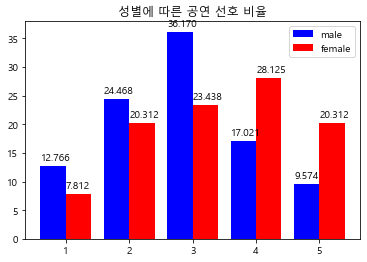

In [55]:
male = male_data['공연']
female = female_data['공연']

male_per = [0]*5
female_per = [0]*5

for i in range(0, 5):
    male_per[i] = male.value_counts()[i+1] / male.count() * 100
    female_per[i] = female.value_counts()[i+1] / female.count() * 100
    
    
x = np.arange(1, 6)
#female_eat.value_counts().plot.bar()
plt.rc('font', family = 'Malgun Gothic')
plt.title("성별에 따른 공연 선호 비율")
plt.bar(x - 0.2, male_per, 0.4, color ='blue', label = "male")
plt.bar(x + 0.2, female_per,0.4, color ='red', label = "female")
for index, per in enumerate(male_per):
    plt.text(x = index + 0.6, y = per + 1, s = "%.3f"%per)
    
for index, per in enumerate(female_per):
    plt.text(x = index + 1.0, y = per + 1, s = "%.3f"%per)
plt.legend()

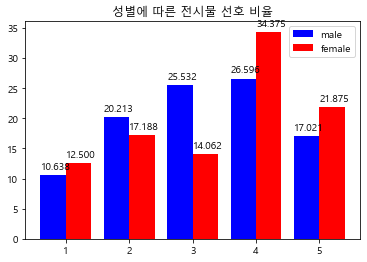

In [53]:
male = male_data['전시물']
female = female_data['전시물']

male_per = [0]*5
female_per = [0]*5

for i in range(0, 5):
    male_per[i] = male.value_counts()[i+1] / male.count() * 100
    female_per[i] = female.value_counts()[i+1] / female.count() * 100
    
    
x = np.arange(1, 6)
#female_eat.value_counts().plot.bar()
plt.rc('font', family = 'Malgun Gothic')
plt.title("성별에 따른 전시물 선호 비율")
plt.bar(x - 0.2, male_per, 0.4, color ='blue', label = "male")
for index, per in enumerate(male_per):
    plt.text(x = index + 0.6, y = per + 1, s = "%.3f"%per)
    
plt.bar(x + 0.2, female_per,0.4, color ='red', label = "female")
for index, per in enumerate(female_per):
    plt.text(x = index + 1.0, y = per + 1, s = "%.3f"%per)
    
plt.legend()

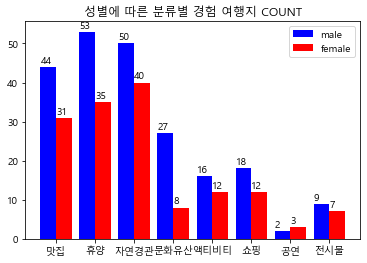

In [79]:
male = male_data['경험']
female = female_data['경험']

male_exp_dic = { '맛집':0, '휴양':0,'자연경관':0, '문화유산':0, '액티비티':0, '쇼핑':0, '공연':0, '전시물':0}
for male_col in male:
    for cat in male_col.split(','):
        male_exp_dic[cat.replace(" ", '')]+=1

female_exp_dic = { '맛집':0, '휴양':0,'자연경관':0, '문화유산':0, '액티비티':0, '쇼핑':0, '공연':0, '전시물':0}
for female_col in female:
    for cat in female_col.split(','):
        female_exp_dic[cat.replace(" ", '')]+=1

male_lst = male_exp_dic.items()
female_lst = female_exp_dic.items()

m_x, m_y = zip(*male_lst)
f_x, f_y = zip(*female_lst)
x = np.arange(0, 8)
plt.title("성별에 따른 분류별 경험 여행지 COUNT")
plt.bar(x-0.2, m_y, 0.4, color ='blue', label = "male")
plt.bar(x+0.2, f_y, 0.4, color ='red', label = "female")

for index, per in zip(x, m_y):
    plt.text(x = index-0.4, y = per + 1, s = per)
    
for index, per in zip(x, f_y):
    plt.text(x = index, y = per + 1, s = per)
    
plt.xticks(x, m_x)
plt.legend()

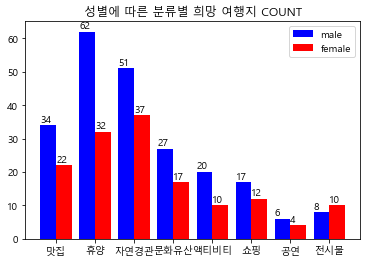

In [78]:
male = male_data['희망']
female = female_data['희망']

male_want_dic = { '맛집':0, '휴양':0,'자연경관':0, '문화유산':0, '액티비티':0, '쇼핑':0, '공연':0, '전시물':0}
for male_col in male:
    for cat in male_col.split(','):
        male_want_dic[cat.replace(" ", '')]+=1

female_want_dic = { '맛집':0, '휴양':0,'자연경관':0, '문화유산':0, '액티비티':0, '쇼핑':0, '공연':0, '전시물':0}
for female_col in female:
    for cat in female_col.split(','):
        female_want_dic[cat.replace(" ", '')]+=1

male_lst = male_want_dic.items()
female_lst = female_want_dic.items()

m_x, m_y = zip(*male_lst)
f_x, f_y = zip(*female_lst)
x = np.arange(0, 8)
plt.title("성별에 따른 분류별 희망 여행지 COUNT")
plt.bar(x-0.2, m_y, 0.4, color ='blue', label = "male")
plt.bar(x+0.2, f_y, 0.4, color ='red', label = "female")

for index, per in zip(x, m_y):
    plt.text(x = index-0.4, y = per + 1, s = per)
    
for index, per in zip(x, f_y):
    plt.text(x = index, y = per + 1, s = per)

plt.xticks(x, m_x)
plt.legend()